# **Exploratory Data Analysis for The US Unemployment Rate Dataset**

In [1]:
#Import Libraries to use

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
#Reading the Datasets from within the kaggle Dataset and dsiplaying the first 5 rows.

In [3]:
df=pd.read_csv('../input/unemployment-by-county-us/output.csv')
df.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [ ]:
#Displaying the last 5 rows as well

In [6]:
df.tail()

,Year,Month,State,County,Rate
885543,2009,November,Maine,Somerset County,10.5
885544,2009,November,Maine,Oxford County,10.5
885545,2009,November,Maine,Knox County,7.5
885546,2009,November,Maine,Piscataquis County,11.3
885547,2009,November,Maine,Aroostook County,9.0


In [7]:
#Displaying the column data types

In [8]:
df.dtypes

Year        int64
Month      object
State      object
County     object
Rate      float64
dtype: object

In [ ]:
#Checking the number of rows and columns the dataset has

In [9]:
df.shape

(885548, 5)

In [ ]:
#summing up the entire rows of null columns to check if there are missing values.

In [10]:
df.isnull().sum()

Year      0
Month     0
State     0
County    0
Rate      0
dtype: int64

In [ ]:
'''
Displaying statistical information of the dataset.This shows that :
 
The minimum value in the year column is 1990 and the maximum value is 2016. 
It also shows that there was an unemployment rate at a point in a particular county that was as high as 58%.
There was also a point in a county in which the unemployment rate was 0. Meaning that there was a 100 % 
employment rate
We can also see that the mean unemployment rate for the entire years and entire county was 6.18%
'''

In [11]:
df.describe()

,Year,Rate
count,885548.000000,885548.000000
mean,2003.000017,6.175010
std,7.824893,3.112535
min,1990.000000,0.000000
25%,1996.000000,4.000000
50%,2003.000000,5.500000
75%,2010.000000,7.700000
max,2016.000000,58.400000


In [ ]:
#checking the outlier looking value:


<function matplotlib.pyplot.show(*args, **kw)>

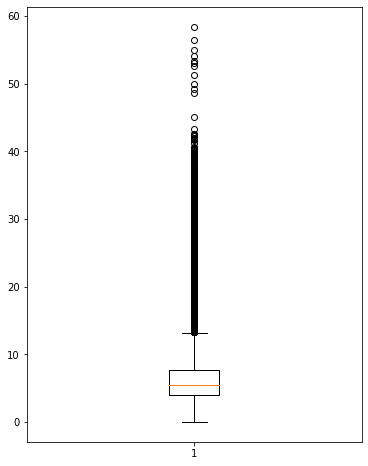

In [19]:
plt.figure(figsize=(6,8))
plt.boxplot(df["Rate"])
plt.show

In [ ]:
#Displaying the number of unique items under state
#This shows that there are 47 represented states in the State Column.

In [20]:
df.State.nunique()

47

In [25]:
state_names=df.State.unique()
state_names

array(['Mississippi', 'Oklahoma', 'Delaware', 'Minnesota', 'Illinois',
       'Arkansas', 'New Mexico', 'Indiana', 'Maryland', 'Louisiana',
       'Idaho', 'Wyoming', 'Tennessee', 'Arizona', 'Iowa', 'Kansas',
       'Utah', 'Virginia', 'Oregon', 'Connecticut', 'Montana',
       'California', 'Massachusetts', 'West Virginia', 'South Carolina',
       'New Hampshire', 'Wisconsin', 'Vermont', 'North Dakota',
       'Pennsylvania', 'Kentucky', 'Hawaii', 'Nebraska', 'Missouri',
       'Ohio', 'Alabama', 'Rhode Island', 'South Dakota', 'Colorado',
       'New Jersey', 'Washington', 'North Carolina', 'New York', 'Texas',
       'Nevada', 'Maine', 'Michigan'], dtype=object)

In [ ]:
#Displaying the unique items in the column state
#This shows all the states represented.
#From that, we can see that Alaska, Florida and Georgia are not represented there
#Even though Florida is the 7th most populous state, Alaska covering the largest area in the US
#and Georgia the 8 most populous state in the US.


In [ ]:
#Counting the number of rows that each unique state occupies in the entire dataset

In [26]:
state_count=df['State'].value_counts()
state_count

Texas             57658
Virginia          39900
Missouri          37260
Kentucky          36360
Kansas            34020
Illinois          33048
North Carolina    32400
Iowa              32076
Tennessee         30780
Nebraska          30132
Indiana           29808
Ohio              28512
Minnesota         28188
Mississippi       26568
Oklahoma          24948
Arkansas          24300
Michigan          24236
Wisconsin         23328
Alabama           21708
Pennsylvania      21708
South Dakota      21384
Colorado          20736
New York          20088
Montana           18144
West Virginia     17820
North Dakota      17172
California        16878
South Carolina    14904
Idaho             14256
Washington        12636
Oregon            11664
New Mexico        10692
Utah               9396
Maryland           7776
Wyoming            7452
New Jersey         6804
Louisiana          6464
Nevada             5508
Maine              5184
Arizona            4860
Massachusetts      4536
Vermont         

In [ ]:
#It is clear that the datasets do not occupy equal number of rows although we can understand that 
#the number of counties vary by state, Texas has the highest number of counties... But it is still
#difficult to tell if that is the only reason for unequal distribution of rows or if some states 
#or counties weren't recorded for some months or years

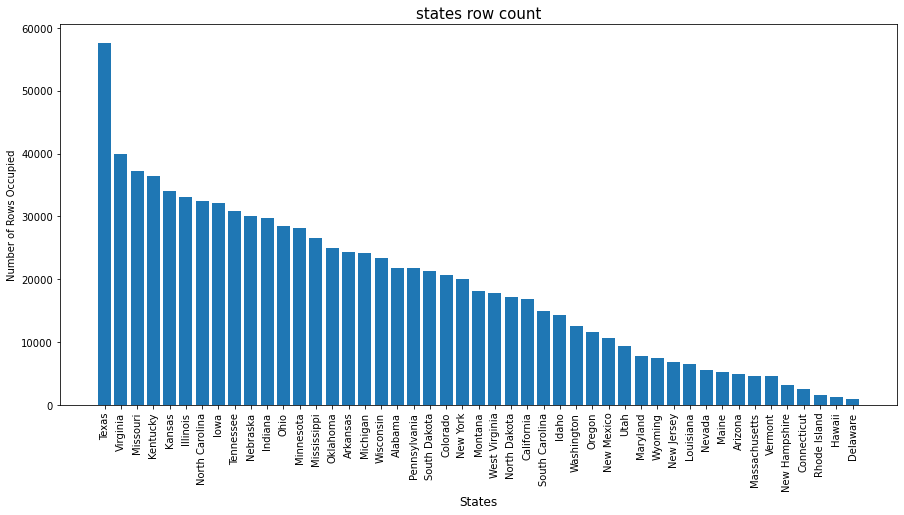

In [27]:
plt.figure(figsize=(15,7))
plt.bar( state_count.index, state_count.values)
plt.xlabel('States', fontsize=12)
plt.ylabel('Number of Rows Occupied', fontsize=10)
plt.title('states row count', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#finding the number of unique values of county
#Since we have a total of 3007 counties in the States, it displays 1752 counties
#This implies not all counties are represented as well


In [28]:
df.County.nunique()

1752

In [ ]:
#Counting the number of rows that each unique County occupies in the entire dataset

In [29]:
df['County'].value_counts()

Washington County          8930
Jefferson County           7334
Lincoln County             7107
Franklin County            6986
Jackson County             6654
                           ... 
East Baton Rouge Parish     101
Beauregard Parish           101
Caddo Parish                101
Grant Parish                101
Bienville Parish            101
Name: County, Length: 1752, dtype: int64

# Finding out more details about the Dataset

In [ ]:
#Checking if there exists high unemployment rates per county

In [52]:
df_data=pd.DataFrame(df, columns=['Year', 'Month','State','County', 'Rate'])
high_rates=df_data[df_data['Rate']>15]
print(high_rates)

        Year     Month           State               County  Rate
44      2015  February     Mississippi     Humphreys County  15.4
68      2015  February     Mississippi     Issaquena County  21.5
436     2015  February      New Mexico          Luna County  21.2
567     2015  February        Maryland     Worcester County  15.6
604     2015  February       Louisiana  East Carroll Parish  16.0
...      ...       ...             ...                  ...   ...
885394  2009  November  North Carolina      Scotland County  16.4
885411  2009  November  North Carolina    Rutherford County  16.2
885435  2009  November  North Carolina        Graham County  16.6
885448  2009  November  North Carolina         Anson County  15.2
885527  2009  November          Nevada          Lyon County  15.8

[13868 rows x 5 columns]


In [47]:
len(high_rates)

13868

In [48]:
percentage_of_high_rate=(len(high_rates)*100)/len(df)
percentage_of_high_rate

1.5660359461034297

In [ ]:
#checking if the selected high rates has a pattern from the years it happened

In [58]:
pd.DataFrame(high_rates)

,Year,Month,State,County,Rate
44,2015,February,Mississippi,Humphreys County,15.4
68,2015,February,Mississippi,Issaquena County,21.5
436,2015,February,New Mexico,Luna County,21.2
567,2015,February,Maryland,Worcester County,15.6
604,2015,February,Louisiana,East Carroll Parish,16.0
...,...,...,...,...,...
885394,2009,November,North Carolina,Scotland County,16.4
885411,2009,November,North Carolina,Rutherford County,16.2
885435,2009,November,North Carolina,Graham County,16.6
885448,2009,November,North Carolina,Anson County,15.2


In [60]:
#thus from the outputs, these high unemployment rate comes from the different years.
high_rates.Year.unique()

array([2015, 2014, 2016, 2011, 2010, 2013, 2012, 1991, 1990, 1993, 1992,
       1995, 1994, 1997, 1996, 1999, 1998, 2002, 2003, 2000, 2001, 2006,
       2007, 2004, 2005, 2008, 2009])

In [62]:
#checking for the states
high_rates.State.nunique()

39

In [64]:
#checking the states exempted: Delaware, Wyoming, Kansas, Connecticut, 
#New Hampshire, Vermont, Nebraska and Rhode Island
high_rates.State.unique()

array(['Mississippi', 'New Mexico', 'Maryland', 'Louisiana', 'Arizona',
       'California', 'West Virginia', 'Kentucky', 'Missouri',
       'New Jersey', 'North Carolina', 'Alabama', 'South Dakota', 'Utah',
       'Minnesota', 'Michigan', 'Oregon', 'Texas', 'Idaho',
       'South Carolina', 'Montana', 'North Dakota', 'Tennessee',
       'Virginia', 'Massachusetts', 'Wisconsin', 'Ohio', 'Colorado',
       'Washington', 'Nevada', 'Illinois', 'Arkansas', 'Indiana',
       'Pennsylvania', 'Oklahoma', 'New York', 'Iowa', 'Hawaii', 'Maine'],
      dtype=object)

In [ ]:
#finding out the highest unemployment rate recorded per county


In [31]:
df['Rate'].max()

58.4

In [ ]:
#displaying the row for more information

In [32]:
max_rate=df_data[df_data['Rate']>58]
print(max_rate)

        Year    Month     State           County  Rate
351231  1992  January  Colorado  San Juan County  58.4


In [ ]:
#The highest unemployment rate was in San Juan County in 1992. 
#This is quite understandable as regards to the year as the country was just recovering from the Early 
#1990's Recession but it is difficult to understand just why the unemployment rate would be so high
#as this implies that more than half of the labour force was unemployed in the county.


In [ ]:
#displaying the rows with zero unemployment rate

In [33]:
zero_rate=df_data[df_data['Rate']==0]
print(zero_rate)

        Year      Month  State           County  Rate
240571  1991   February  Texas    Loving County   0.0
245907  1991      March  Texas    Loving County   0.0
253942  1991    January  Texas    Loving County   0.0
261909  1991      April  Texas    Loving County   0.0
264736  1991   December  Texas    Loving County   0.0
270072  1991   November  Texas    Loving County   0.0
275416  1990    October  Texas  McMullen County   0.0
281122  1990     August  Texas  McMullen County   0.0
283943  1990        May  Texas  McMullen County   0.0
292152  1990  September  Texas  McMullen County   0.0
297526  1990   December  Texas    Loving County   0.0
316395  1993        May  Texas    Loving County   0.0
319216  1993    January  Texas    Loving County   0.0
324668  1993  September  Texas    Loving County   0.0
332623  1993       July  Texas    Loving County   0.0
343209  1992      March  Texas    Loving County   0.0
359437  1992      April  Texas    Loving County   0.0


In [ ]:
#The above information shows that Loving county and McMullen County of Texas experienced the lowest unemployment 
#rate through 1990 to 2016
#Although having a zero unemployment rate isn't a great thing because it would mean that there were probably too 
#much roles filled by too little people or it would imply the unavailability of people to fill up certain roles 
#if there is need to change labor. it would increase the cosst of labour. It would also imply a stagnant economy
#as it would be impossible to upscale with the absence of labor
#Most believe a zero unemployment rate is imppossible. It is thus difficult to tell if this aspect of the 
#dataset is valid.

# **Observations by Grouping**

In [ ]:
#Getting the average rate of unemployment for each state per year.
#"reset_index" rearranges and assigns new indexes. This allows the created dataset to 
#become a list and not a dictionary.

In [ ]:
#Grouping the dataset according to the average mean from the year 1990 to 2016

In [34]:
mean_state = df.groupby(["State"])["Rate"].aggregate("mean").reset_index()
print (mean_state)

             State      Rate
0          Alabama  7.723844
1          Arizona  9.274588
2         Arkansas  6.782210
3       California  9.045005
4         Colorado  5.358946
5      Connecticut  5.548534
6         Delaware  5.041049
7           Hawaii  5.730401
8            Idaho  6.319992
9         Illinois  6.548596
10         Indiana  5.922725
11            Iowa  4.236744
12          Kansas  4.178851
13        Kentucky  7.238306
14       Louisiana  7.812949
15           Maine  6.263985
16        Maryland  5.866422
17   Massachusetts  5.673611
18        Michigan  8.136136
19       Minnesota  5.403750
20     Mississippi  8.320517
21        Missouri  6.258425
22         Montana  5.305418
23        Nebraska  3.109903
24          Nevada  6.737019
25   New Hampshire  4.345710
26      New Jersey  6.422105
27      New Mexico  7.083895
28        New York  6.226225
29  North Carolina  6.708099
30    North Dakota  3.848084
31            Ohio  6.923390
32        Oklahoma  5.228062
33          Or

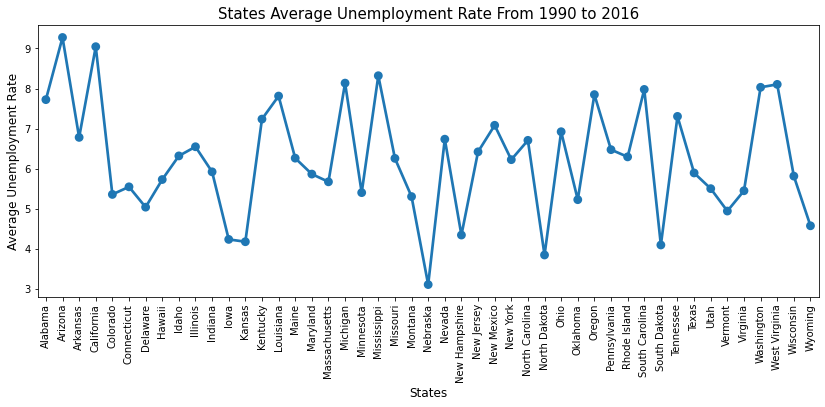

In [35]:
plt.figure(figsize=(14,5))
sns.pointplot(mean_state['State'],mean_state['Rate'] )
plt.xlabel('States', fontsize=12)
plt.ylabel('Average Unemployment Rate', fontsize=12)
plt.title('States Average Unemployment Rate From 1990 to 2016', fontsize=15)
plt.xticks(rotation='vertical')


plt.show()

In [ ]:
#Through the duration of 1990 to 2016, we can see that Arizona has the highest average unemployment rate of 9.3%
#And Nebraska has the lowest average unemployment rate of 3.1% within the same duration
#We can say Nebraska has managed to maintain a low unemployment rate through these years although that 
#doesn't imply that its economy is the best among the states.

In [ ]:
#Grouping according to the average unemployment rate for each year for the entire country

In [36]:
year_grp = df.groupby(["Year"])["Rate"].aggregate("mean").reset_index()
print (year_grp)


    Year      Rate
0   1990  6.093021
1   1991  7.142391
2   1992  7.464904
3   1993  6.924037
4   1994  6.186649
5   1995  5.893411
6   1996  5.912081
7   1997  5.474520
8   1998  5.114221
9   1999  4.873476
10  2000  4.321123
11  2001  4.985591
12  2002  5.720915
13  2003  6.027990
14  2004  5.695817
15  2005  5.438981
16  2006  4.979263
17  2007  4.896069
18  2008  5.759990
19  2009  8.883838
20  2010  9.189580
21  2011  8.523477
22  2012  7.657544
23  2013  7.211610
24  2014  6.096365
25  2015  5.401873
26  2016  5.160680


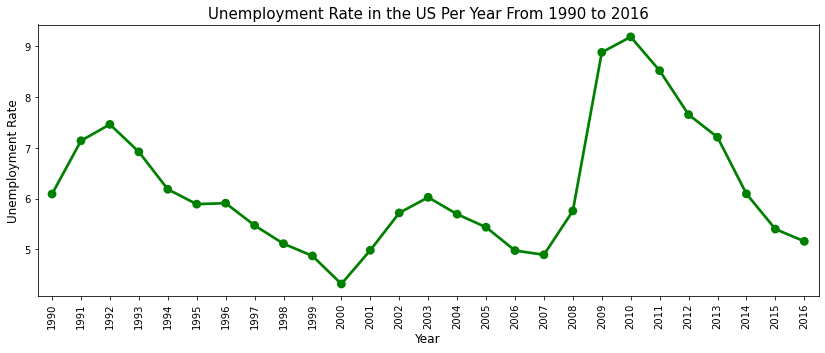

In [37]:
plt.figure(figsize=(14,5))
sns.pointplot(year_grp['Year'], year_grp['Rate'], color='green')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate', fontsize=12)
plt.title('Unemployment Rate in the US Per Year From 1990 to 2016', fontsize=15)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
#The US experienced the highest Unemployment Rate (9.19%) in 2010 and it can be assumed that this high rate of 
#unemployment was the after effect of the Great Recession that started in December 2007 and ended in June 2009. 
#But even during the recession, 2009 experienced a spike in the unemployment rate; from 5.76% to 8.89%

#The lowest unemployment Rate (4.32%) occured in 2000 within this duration. it is difficult to 
#understand why there was such a drop in the unemployment rate as the world began to experience a recession in 
#developed country from 2000 to 2001 although America expereinced this recession from March to November 2001
#The year 2001 - 2003 observed a steady rise in the Unemployment Rate. It was untill 2004 that there 
#became a decrease in the Rate. It is important to know that the collapse of the World trade center in September
#2001 may have had an effect on the rate too.


#The effect of the recession that occured in the early 1990's (July 1990 to March 1991) is seen notably 
#in 1991 and 1992. This lets us see that unemployment rates in the US rises slightly after a year or 
#two after an economic recession


In [4]:
year_state_grp = df.groupby(["Year", "State", "Month"])["Rate"].aggregate("mean").reset_index()


In [ ]:
#visualizing the year 2010 by month since it has the highest unemployment rate

In [5]:
year_2010=year_state_grp[10900:11460]
year_2010.sort_index(ascending=False)
print(year_2010)

       Year    State      Month       Rate
10900  2010  Alabama      April  12.226866
10901  2010  Alabama     August  11.913433
10902  2010  Alabama   December  11.405970
10903  2010  Alabama   February  14.268657
10904  2010  Alabama    January  14.452239
...     ...      ...        ...        ...
11455  2010  Wyoming      March   7.313043
11456  2010  Wyoming        May   6.200000
11457  2010  Wyoming   November   5.873913
11458  2010  Wyoming    October   5.178261
11459  2010  Wyoming  September   5.004348

[560 rows x 4 columns]


In [6]:
len(year_2010)

560

In [7]:
year_2010_month = df.groupby(["Month"])["Rate"].aggregate("mean").reset_index()
monthss=['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

print (year_2010_month)

        Month      Rate
0       April  6.011266
1      August  5.853476
2    December  6.037602
3    February  7.108245
4     January  7.215534
5        July  6.160219
6        June  6.262862
7       March  6.787332
8         May  5.868393
9    November  5.762969
10    October  5.465816
11  September  5.558903


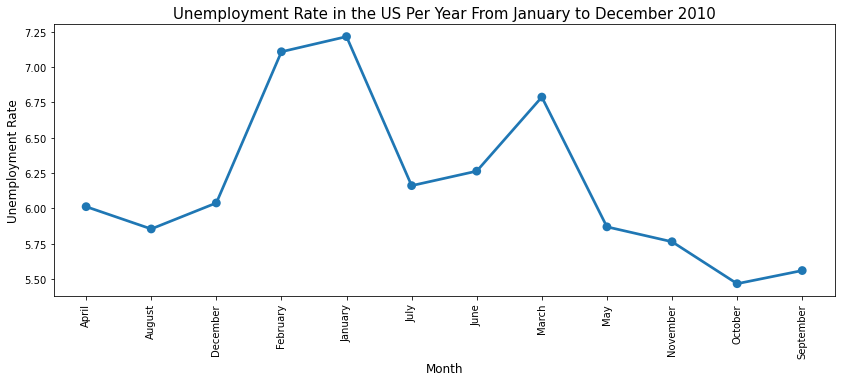

In [8]:
plt.figure(figsize=(14,5))
sns.pointplot(year_2010_month['Month'], year_2010_month['Rate'], sort=False)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Unemployment Rate', fontsize=12)
plt.title('Unemployment Rate in the US Per Year From January to December 2010', fontsize=15)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
#The higherst unemployment rates in those months are January, February, March
#For this year 2010, we can say these months influenced the high unemployment rate for that year.